## 导入库函数定义类

In [10]:
# 需要导入的库
import math
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 定义节点类
class Node:
    def __init__(self, id, resource):
        self.id = id  # 节点ID
        self.resource = resource  # 资源数量
        self.evaluation = 0  # 评估值
        self.neighbors = []  # 邻居节点列表

    # 计算评估值
    def calculate_evaluation(self, network=None):
        total_resource = sum([node.resource for node in self.neighbors]) + self.resource
        avg_resource = total_resource / (len(self.neighbors) + 1)
        return abs(self.resource - avg_resource)

    # 发起请求获取更好的资源配置
    def request_swap(self, network):
        max_gain_node = None
        max_gain_value = -float('inf')
        
        for neighbor in self.neighbors:
            swap_gain_value = self.calculate_swap_gain(neighbor)
            if swap_gain_value > max_gain_value:
                max_gain_node = neighbor
                max_gain_value = swap_gain_value
        
        if max_gain_node is not None and max_gain_value > 0:
            network.swap_resources(self, max_gain_node)

    # 计算与邻居节点交换资源后的收益值    
    def calculate_swap_gain(self, other):
        new_self_resource = (self.resource + other.resource) // 2
        new_other_resource = (self.resource + other.resource) - new_self_resource

        old_eval_self_before_swap = self.calculate_evaluation()
        old_eval_other_before_swap = other.calculate_evaluation()

        self.resource, other.resource = new_self_resource, new_other_resource

        new_eval_self_after_swap = self.calculate_evaluation()
        new_eval_other_after_swap = other.calculate_evaluation()

        self.resource, other.resource = other.resource, self.resource

        gain_value = (old_eval_self_before_swap + old_eval_other_before_swap) - (new_eval_self_after_swap + new_eval_other_after_swap)
        
        return gain_value

    # 设置邻居节点
    def set_neighbors(self, neighbors):
        self.neighbors = neighbors



In [3]:
# 定义网络类
class Network:
    def __init__(self):
        self.nodes = []  # 节点列表
    
    # 添加节点
    def add_node(self, node):
        self.nodes.append(node)

    # 交换两个节点的资源数量
    def swap_resources(self, node1, node2):
        node1.resource, node2.resource = node2.resource, node1.resource
        
    # 迭代优化过程，直到达到稳定状态为止    
    def optimize(self):
        stable_flag = False
        while not stable_flag:
            stable_flag = True
            
            for i in range(len(self.nodes)):
                current_node = self.nodes[i]
                
                old_evaluation_value = current_node.evaluation
                
                current_node.evaluation = current_node.calculate_evaluation()
                
                if current_node.evaluation < old_evaluation_value:
                    stable_flag = False
                    
                current_node.request_swap(self)


    

In [4]:
# 创建图形展示函数
def draw_network(network, title):
    G = nx.Graph()
    for node in network.nodes:
        G.add_node(node.id, resource=node.resource)
        for neighbor in node.neighbors:
            G.add_edge(node.id, neighbor.id)

    pos = nx.spring_layout(G)
    node_labels = nx.get_node_attributes(G, 'resource')
    nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=700, node_color="skyblue", font_size=15)
    plt.title(title)
    plt.show()


   

## 资源初始化

In [8]:
network = Network()

# 创建5个节点并添加到网络中，初始时每个节点有不同的资源数量
nodes_list = [Node(i+1, (i+1)*10) for i in range(5)]
for node in nodes_list:
    network.add_node(node)

# 自定义每个节点的邻居关系
nodes_list[0].set_neighbors([nodes_list[1], nodes_list[2]])
nodes_list[1].set_neighbors([nodes_list[0], nodes_list[2], nodes_list[3]])
nodes_list[2].set_neighbors([nodes_list[0], nodes_list[1], nodes_list[3], nodes_list[4]])
nodes_list[3].set_neighbors([nodes_list[1], nodes_list[2], nodes_list[4]])
nodes_list[4].set_neighbors([nodes_list[2], nodes_list[3]])


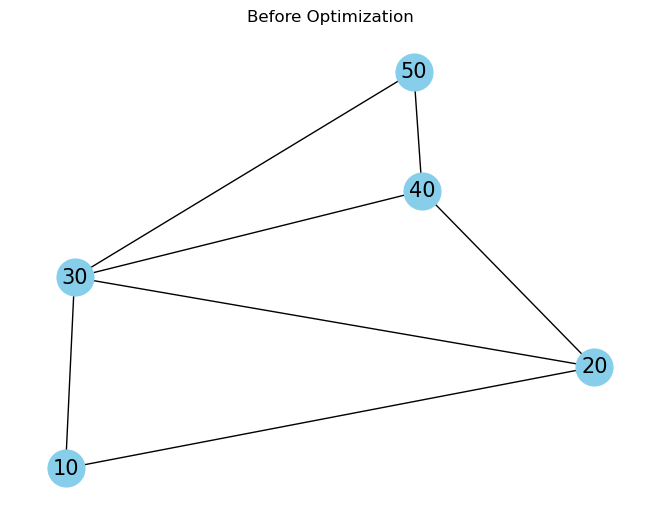

In [11]:

# 绘制优化前的网络
draw_network(network, "Before Optimization")

## 结果可视化

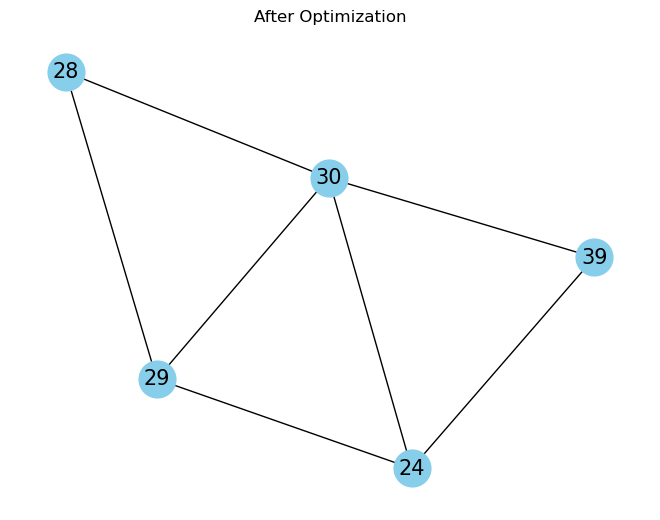

In [12]:
# 执行优化过程，直到达到稳定状态为止
network.optimize()

# 绘制优化后的网络
draw_network(network, "After Optimization")